<a href="https://colab.research.google.com/github/SimoneMonastero/Pink_Horizons/blob/main/CLASSIFIER/Classifier_3_days_WITH_ROC_IMAGE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASSIFICATION TASK

In [18]:
import numpy as np #used a lot in signal processing
from sklearn.metrics import roc_curve, auc
import pandas as pd #used with spreadshits
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression #read thedocumantation about it
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate, KFold
from sklearn.metrics import recall_score

# Setting the seed of the random generator
SEED = 42
n_folds = 5;


In [4]:
X = pd.read_excel('/content/output.xlsx')

print(X)

    walking_percentage  total_steps  stride_time  valid_bouts  avg_range  \
0             6.558898        15583     1.024000           60   1.470736   
1             2.071489         9673     1.137778           42   1.191708   
2             5.103469        18690     1.137778           65   1.484476   
3             1.560376         5561     1.137778           28   1.323149   
4             1.260745         5684     1.024000           20   1.709768   
5             1.536672         6605     1.137778           26   0.810558   
6             1.527413         6936     1.280000           32   1.062091   
7             0.613706         3323     0.930909           16   1.697811   
8             5.712707        24059     1.137778           91   1.716205   
9             2.330749        10525     1.137778           46   1.438908   
10            0.863000         3392     1.024000           17   1.837213   
11            0.603706         2793     1.280000           15   1.379936   
12          

In [5]:
features_FA = list(X.columns) #with df.columns extract the name of all the
#columns and with list we create a list with all the names


In [6]:
print("FA shape before NaN removal:", X.shape)


X.dropna(axis=0, how='any', inplace=True)


print("FA shape after NaN removal:", X.shape)

#


FA shape before NaN removal: (56, 7)
FA shape after NaN removal: (56, 7)


In [7]:
# Now, X has all columns, so we can correctly select X_features
X = X.drop('total_minutes', axis=1)
#X = X.drop('walking_percentage', axis=1)
X_features = X.drop('labels', axis=1)


display(X_features.head())

,walking_percentage,total_steps,stride_time,valid_bouts,avg_range
0,6.558898,15583,1.024000,60,1.470736
1,2.071489,9673,1.137778,42,1.191708
2,5.103469,18690,1.137778,65,1.484476
3,1.560376,5561,1.137778,28,1.323149
4,1.260745,5684,1.024000,20,1.709768


In [8]:
Y = X['labels']
print(Y)

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
50    1
51    1
52    1
53    1
54    1
55    1
Name: labels, dtype: int64


Questo codice concatena i due dataframe `FA` e `CO` in un nuovo dataframe chiamato `X`. L'argomento `ignore_index=True` assicura che il nuovo dataframe `X` abbia un indice continuo e non mantenga gli indici originali di `FA` e `CO` che potrebbero essere duplicati.

In [9]:
clf = LogisticRegression(max_iter=1000, class_weight='balanced')


cv = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)

for train_index, test_index in cv.split(X_features):
    print("Train:", train_index, " Test:", test_index)

Train: [ 1  2  4  6  7  8  9 10 11 14 15 16 17 18 20 21 22 23 24 25 27 28 29 30
 31 32 34 35 37 38 39 40 41 42 43 45 46 47 48 49 51 52 53 55]  Test: [ 0  3  5 12 13 19 26 33 36 44 50 54]
Train: [ 0  1  2  3  5  7  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24 25 26 28
 29 31 32 33 35 36 37 38 39 40 42 43 44 45 48 49 50 51 53 54 55]  Test: [ 4  6  8 17 27 30 34 41 46 47 52]
Train: [ 0  1  2  3  4  5  6  7  8 10 12 13 14 17 18 19 20 21 22 23 26 27 28 29
 30 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 50 51 52 54 55]  Test: [ 9 11 15 16 24 25 31 32 48 49 53]
Train: [ 0  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 22 24 25 26 27
 28 30 31 32 33 34 36 38 41 42 44 46 47 48 49 50 51 52 53 54 55]  Test: [ 1  2 21 23 29 35 37 39 40 43 45]
Train: [ 0  1  2  3  4  5  6  8  9 11 12 13 15 16 17 19 21 23 24 25 26 27 29 30
 31 32 33 34 35 36 37 39 40 41 43 44 45 46 47 48 49 50 52 53 54]  Test: [ 7 10 14 18 20 22 28 38 42 51 55]


In [10]:
score = cross_validate(clf, X=X_features, y=Y, cv=cv, return_train_score=True, return_estimator=True, scoring = 'roc_auc')
print("This is the score object:")
print (score)
print("Average AUC test set:", np.mean(score['test_score']))

This is the score object:
{'fit_time': array([0.05708885, 0.03022552, 0.02497792, 0.02460098, 0.02363658]), 'score_time': array([0.01006436, 0.00448155, 0.00451779, 0.00438833, 0.00439882]), 'estimator': [LogisticRegression(class_weight='balanced', max_iter=1000), LogisticRegression(class_weight='balanced', max_iter=1000), LogisticRegression(class_weight='balanced', max_iter=1000), LogisticRegression(class_weight='balanced', max_iter=1000), LogisticRegression(class_weight='balanced', max_iter=1000)], 'test_score': array([0.8125    , 0.56666667, 0.58333333, 0.8       , 0.60714286]), 'train_score': array([0.73931624, 0.75840336, 0.79352227, 0.75215517, 0.75925926])}
Average AUC test set: 0.6739285714285714


In [16]:
from sklearn.metrics import recall_score

sensitivities = []
specificities = []

for i, (train_index, test_index) in enumerate(cv.split(X_features, Y)):
    # Get the fitted estimator for the current fold
    fold_estimator = score['estimator'][i]

    # Get the test data for the current fold
    X_test_fold = X_features.iloc[test_index]
    y_test_fold = Y.iloc[test_index]

    # Make predictions on the test set for the current fold
    y_pred_fold = fold_estimator.predict(X_test_fold)

    # Calculate sensitivity (recall for class 1)
    sensitivity = recall_score(y_test_fold, y_pred_fold, pos_label=1)
    sensitivities.append(sensitivity)

    # Calculate specificity (recall for class 0)
    specificity = recall_score(y_test_fold, y_pred_fold, pos_label=0)
    specificities.append(specificity)

print("Average Sensitivity after cross-validation:", np.mean(sensitivities))
print("Average Specificity after cross-validation:", np.mean(specificities))

Average Sensitivity after cross-validation: 0.7100000000000001
Average Specificity after cross-validation: 0.5914285714285714


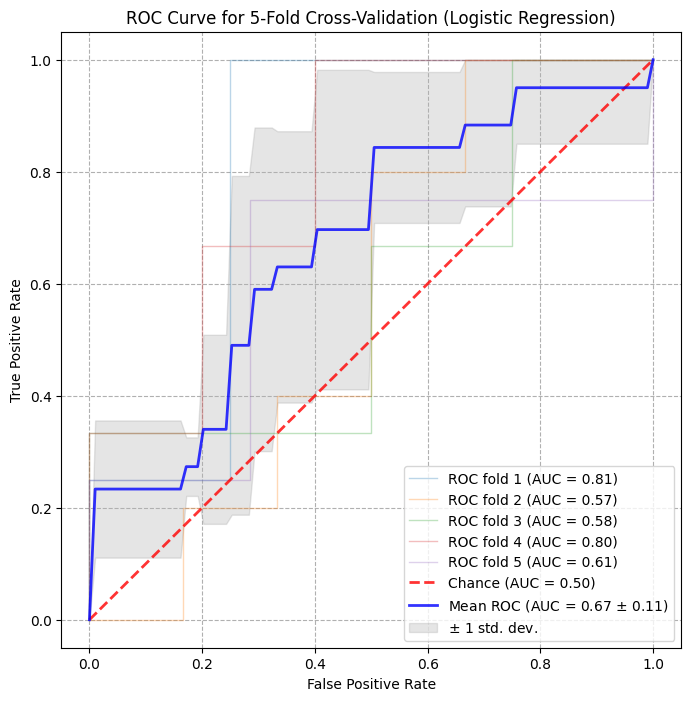

In [19]:
cv = KFold(n_splits=n_folds, shuffle=True, random_state=SEED)
clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=SEED)

# Run cross_validate to train models and get estimators
score = cross_validate(clf, X=X_features, y=Y, cv=cv, return_train_score=True, return_estimator=True, scoring = 'roc_auc')
# --- 3. ROC Curve Plotting Logic ---
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(8, 8))

for i, (train_index, test_index) in enumerate(cv.split(X_features, Y)):
    X_test_fold = X_features.iloc[test_index]
    y_test_fold = Y.iloc[test_index]
    fold_estimator = score['estimator'][i]

    # Calculate probabilities for class 1
    y_proba = fold_estimator.predict_proba(X_test_fold)[:, 1]

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test_fold, y_proba)
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)

    # Interpolate TPR for mean ROC curve calculation
    tprs.append(np.interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    # Plot individual ROC curve
    ax.plot(fpr, tpr, lw=1, alpha=0.3,
            label=f'ROC fold {i+1} (AUC = {roc_auc:.2f})')

# Plot the diagonal line (random guess)
ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
        label='Chance (AUC = 0.50)', alpha=.8)

# Calculate and plot the mean ROC curve
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

ax.plot(mean_fpr, mean_tpr, color='b',
        label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
        lw=2, alpha=.8)

# Calculate and plot the standard deviation around the mean ROC
std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                label=r'$\pm$ 1 std. dev.')

# Final plot configuration
ax.set(xlim=[-0.05, 1.05], ylim=[-0.05, 1.05],
       title="ROC Curve for 5-Fold Cross-Validation (Logistic Regression)")
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc="lower right")
ax.grid(linestyle='--')

plt.show() # Use plt.show() to display the plot or plt.savefig() to save it.
